<a href="https://colab.research.google.com/github/delowerhossentuhin/CVPR/blob/main/MID/digit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from google.colab import drive
import os
import random
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# gpu_device = tf.config.experimental.list_physical_devices('GPU')
# print(f"Number of GPU = {len(gpu_device)}")
# tf.config.experimental.set_memory_growth(gpu_device[0], True)

In [ ]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


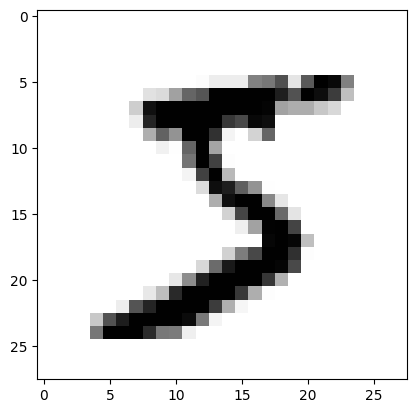

In [ ]:
plt.imshow(X_train[0],cmap = "gray_r")

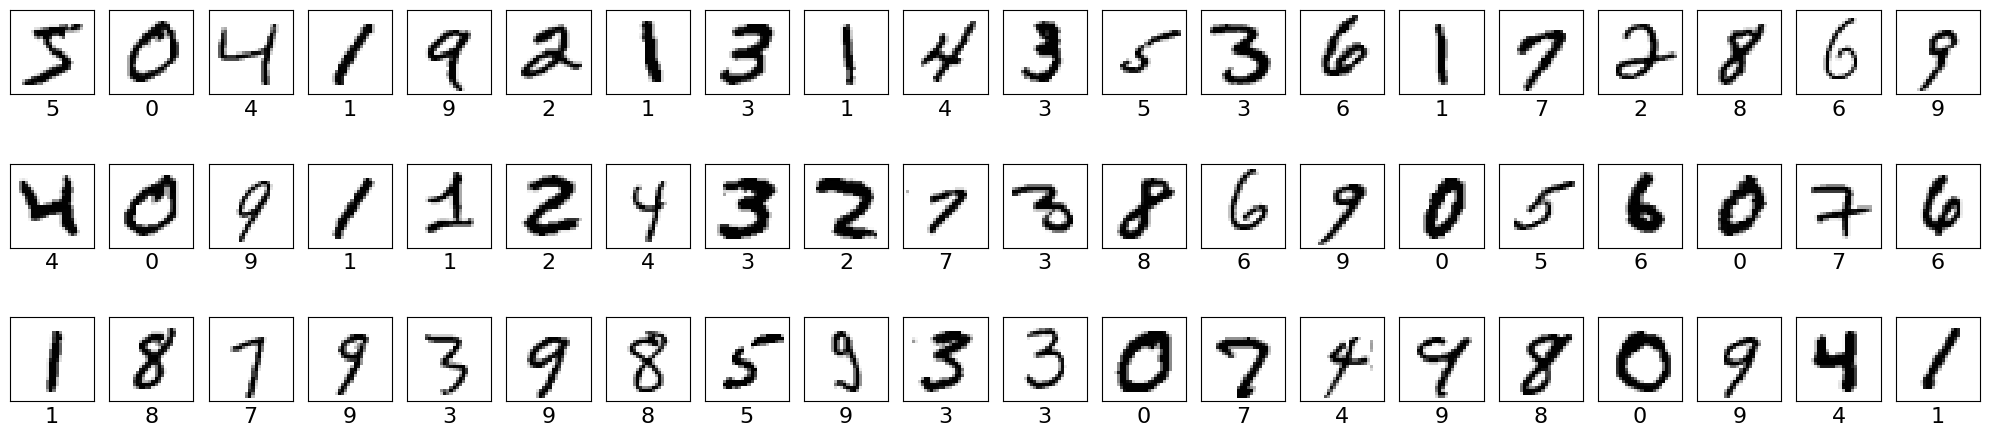

In [ ]:
row = 3
column = 20
i = 0
plt.figure(figsize=(20,5))
for r in range(row):
  for c in range(column):
    plt.subplot(row,column,i+1)
    plt.imshow(X_train[i],cmap = "gray_r")
    plt.xlabel(Y_train[i],fontsize=16)
    plt.xticks([])
    plt.yticks([])
    i+=1
plt.tight_layout()
plt.show()

In [ ]:
X_train = X_train.reshape(-1,28*28).astype("float32")/255.0
X_test = X_test.reshape(-1,28*28).astype("float32")/255.0

# X_train_cnn = X_train.reshape(-1, 28, 28, 1) / 255.0
# X_test_cnn  = X_test.reshape(-1, 28, 28, 1) / 255.0

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


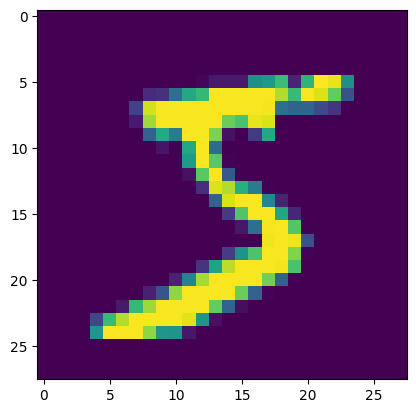

In [ ]:
plt.imshow(X_train[0].reshape(28,28))

In [ ]:
# Model Build
model = keras.Sequential([
    keras.Input(shape=(28*28,)),
    layers.Dense(units = 256, activation = 'relu'),
    layers.Dense(units = 128, activation = 'relu'),
    layers.Dense(units = 10, activation = 'softmax')
])

# model = keras.Sequential([
#     layers.Input(shape=(28,28,1)),
#     layers.Conv2D(32, (3,3), activation='relu'),
#     layers.MaxPooling2D((2,2)),
#     layers.Conv2D(64, (3,3), activation='relu'),
#     layers.MaxPooling2D((2,2)),
#     layers.Flatten(),
#     layers.Dense(128, activation='relu'),
#     layers.Dense(10, activation='softmax')
# ])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

**Params** = (**input_units** × **output_units**) + **output_units**

**Where:**

- **input_units** → *number of input features to the layer*  
- **output_units** → *number of neurons in the layer*  
- **+ output_units** → *for biases, one per neuron*


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
h = model.fit(
    x=X_train,
    y=Y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.3
)

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8727 - loss: 0.4233 - val_accuracy: 0.9579 - val_loss: 0.1377
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.9691 - loss: 0.0984 - val_accuracy: 0.9657 - val_loss: 0.1202
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9799 - loss: 0.0645 - val_accuracy: 0.9667 - val_loss: 0.1087
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9861 - loss: 0.0428 - val_accuracy: 0.9721 - val_loss: 0.1006
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9886 - loss: 0.0338 - val_accuracy: 0.9733 - val_loss: 0.1029


In [ ]:
model.save("/content/drive/MyDrive/Project and Coding/Computer Vision and Pattern Recognition/MNist --- Train and Test/mnist_model.keras")

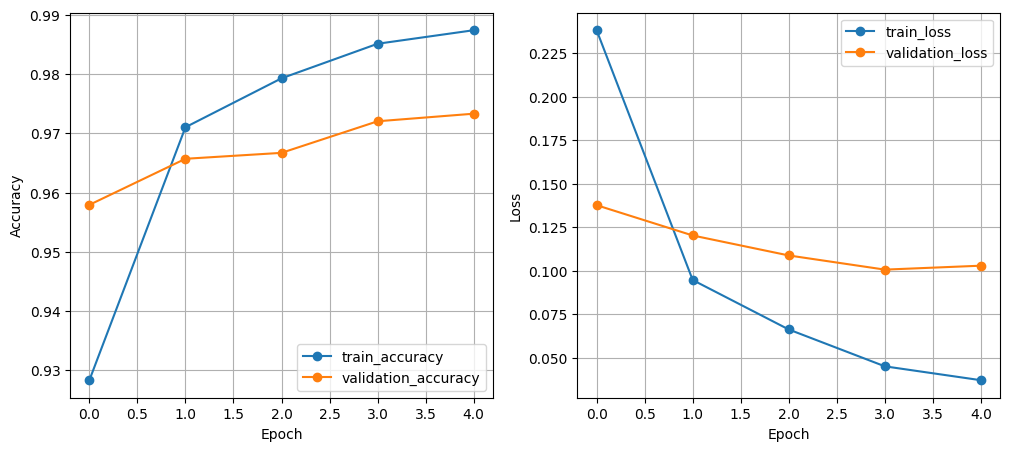

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'],'-o',label = "train_accuracy")
plt.plot(h.history['val_accuracy'],'-o',label = "validation_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend(loc = "lower right")

plt.subplot(1,2,2)
plt.plot(h.history['loss'],'-o',label = "train_loss")
plt.plot(h.history['val_loss'],'-o',label = "validation_loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend(loc = 'upper right')

In [ ]:
h.history['accuracy'] # --> 5 epochs

[0.9283333420753479,
 0.9710476398468018,
 0.9793094992637634,
 0.9851428866386414,
 0.9874285459518433]

In [ ]:
# Evaluate
test_loss, test_acc = model.evaluate(X_test,Y_test)
print("Test Accuracy",test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9754 - loss: 0.0942
Test Accuracy 0.9771999716758728
